## Mushroom classification
Сlassify mushrooms into poisonous and edible according to their appearance.

### Result:
Mushrooms are well studied, and people have long known how to distinguish poisonous mushrooms from edible ones.

As initial data, each fungus is described by a detailed set of external features.

These features were enough to create a model that predicts with 100% accuracy whether this mushroom can be eaten.

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# enable drawing plots in jupyter
%matplotlib inline

# import models from scikit-learn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# import model evaluations
from sklearn.model_selection import train_test_split

## Import data

In [24]:
# Read data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IsimaZZ2/Exo/mushrooms.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Data exploration

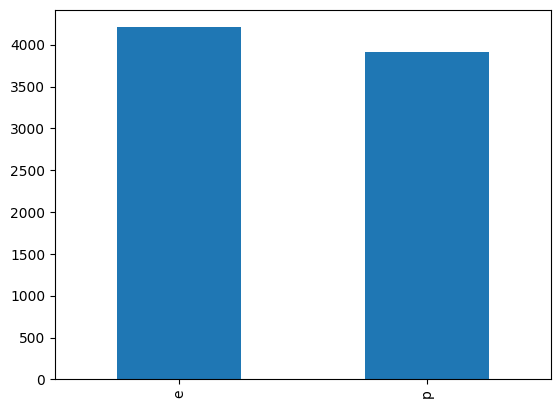

In [25]:
# Check how data is distrubuted between two mushroom classes
df["class"].value_counts().plot(kind="bar");

In [26]:
# Look what type of data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [27]:
# Is there any missing data
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Data preparation
All data is non-numerical. Transform it into numerical categories.

In [28]:
# Transform data into numerical categories

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Cross-validation showed large score difference between batch samples.
Shuffling data could help to solve this problem.

In [29]:
# Shuffle data
np.random.seed(99)

df = df.sample(frac=1).reset_index()
df = df.drop("index", axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,0,3,0,5,1,1,0,4,...,0,7,7,0,2,1,0,3,0,1
1,0,5,3,4,1,5,1,0,0,10,...,2,3,6,0,2,1,4,2,4,0
2,0,5,3,3,1,5,1,0,0,9,...,2,3,3,0,2,1,4,2,5,0
3,1,2,3,2,0,8,1,0,1,0,...,2,7,7,0,2,1,0,7,4,4
4,1,3,3,2,0,2,1,0,1,0,...,1,7,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,5,0,4,1,5,1,0,0,9,...,2,3,6,0,2,1,4,2,4,0
8120,0,2,3,3,1,5,1,0,0,7,...,2,6,7,0,2,1,4,2,5,0
8121,1,5,3,4,0,7,1,0,1,0,...,2,7,7,0,2,1,0,7,4,2
8122,1,3,2,2,0,8,1,0,1,0,...,1,6,7,0,2,1,0,7,4,2


## Modelling

In [30]:
# Split data into X (features) and y (labels)
X = df.drop("class", axis=1)
y = df["class"]
y

0       0
1       0
2       0
3       1
4       1
       ..
8119    0
8120    0
8121    1
8122    1
8123    1
Name: class, Length: 8124, dtype: int64

In [31]:
# Split data into train and test sets
np.random.seed(99)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    model: a dict of different models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_train: training labels
    """
    np.random.seed(99)

    #dict to keep model scores
    model_scores = {}

    # loop through models
    for name, model in models.items():
        # fit model to the data
        model.fit(X_train, y_train)
        # evaluate model
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

Look how different models solve this classification problem.

In [33]:
# LinearSVC
# LogisticRegression
# KNeighborsClassifier
# RandomForestClassifier

# Create dictionary with models
models = {"LinearSVC": LinearSVC(),
          "LogisticRegression": LogisticRegression(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.9502708025603152,
 'LogisticRegression': 0.9517479074347612,
 'KNeighborsClassifier': 1.0,
 'RandomForestClassifier': 1.0}